# Example Project on Machine Learning: Housing Prices in California

### Data load

In [1]:
import os
import pandas as pd
import numpy as np

HOUSING_PATH = "dataset/"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [2]:
df = load_housing_data()
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

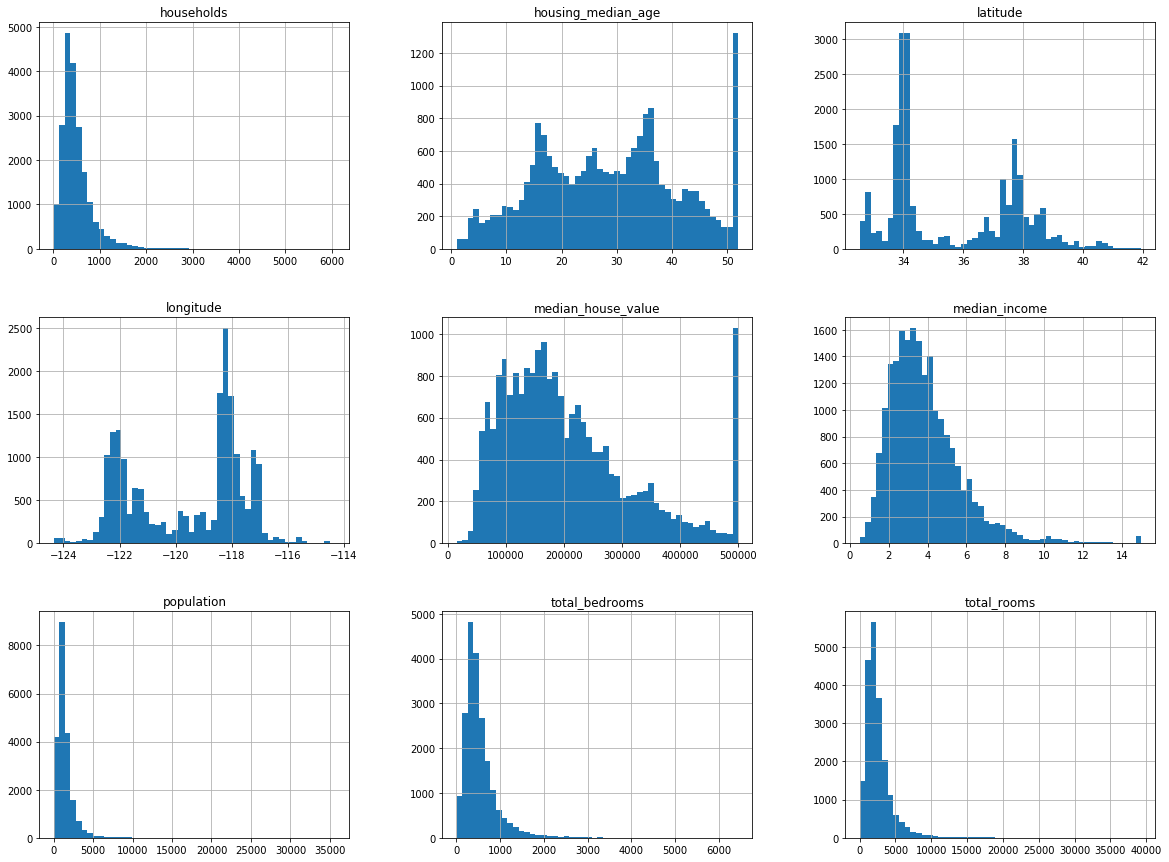

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### Stratification of data

We create a new column "income_cat" to do the data split in respect to this column. The stratification allows us to keep the same propotions of categories (stratas) in test and train sets after the data split

In [6]:
df["income_cat"] = np.ceil(df["median_income"] / 1.5)
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [8]:
df["income_cat"].value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [9]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [10]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [11]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)
strat_test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.00000,4128.000000,4128.000000
mean,-119.545187,35.600998,28.585029,2687.902132,549.484187,1448.220446,509.45688,3.850998,206315.401647
std,2.010260,2.127489,12.630172,2345.868226,454.414696,1197.088364,407.59254,1.879270,114170.048854
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.00000,0.499900,14999.000000
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.00000,2.543000,118975.000000
50%,-118.455000,34.220000,28.000000,2158.500000,441.000000,1172.000000,416.00000,3.514750,181300.000000
75%,-117.980000,37.690000,37.000000,3171.000000,653.000000,1754.000000,613.00000,4.739700,269025.000000
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.00000,15.000100,500001.000000


### Visualization 

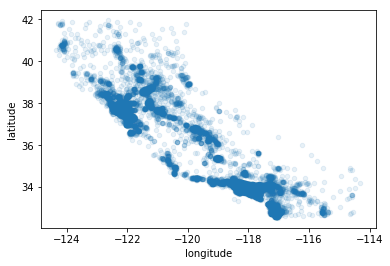

In [12]:
df_viz = strat_train_set.copy()
df_viz.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

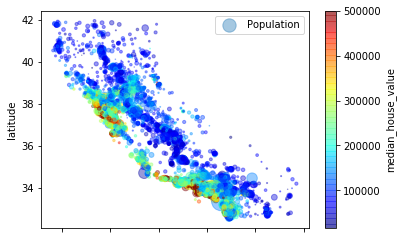

In [13]:
df_viz.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df_viz["population"]/100, label="Population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) 
plt.legend()

### Correlations

In [14]:
df_cor = strat_train_set.copy()
corr_matrix = df_cor.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The corr coef only measures linear correlations, it is not sensitive to nonlinear relations, it doesn't show a slope either. For both y=2x and y=20x, the corr coef is 1, for y = -2x the corr coef is -1.

In [15]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C690CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011CF9C88>]], dtype=object)

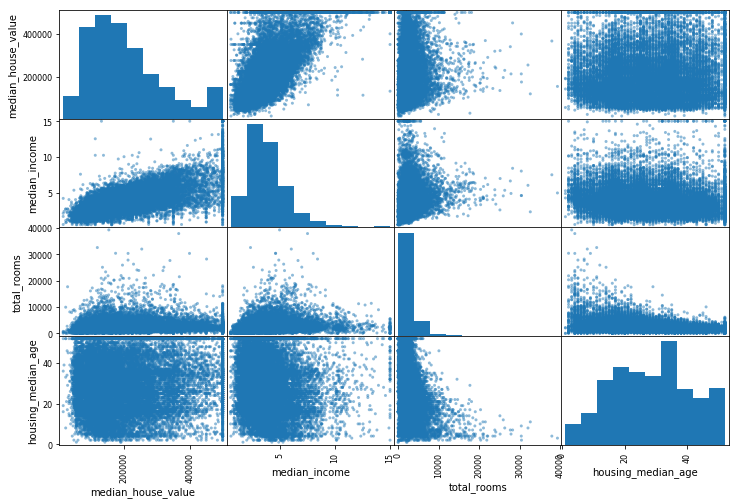

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize = (12, 8))

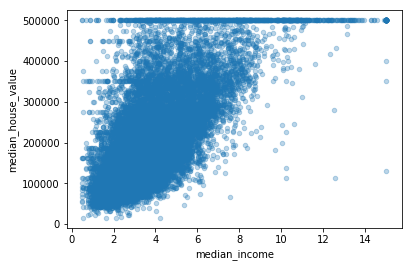

In [17]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.3)

Experimenting with attribute combinations

In [18]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [19]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Data Preparation for ML Algorithms 

drop() creates copy of dataset without affecting it

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Data cleaning

Scikit_learn objects:
1. Estimators (e.g., an imputer). 
   Methods: fit(), parameter - dataset, or two if 
   supervised learning. Other parameter is hyperparam 
   (e.g., imputer's strategy)
   All hyperparam are accessible (e.g., 
   imputer.strategy) and learned param are accessible 
   publically (imputer.statistics_)
   
2. Transformers (e.g., an imputer).
   Methods: fit_transform(), parameter - dataset
   
3. Predictors (e.g., LinearRegression).
   Methods: predict(), score() (measures the quality of 
   prediction)

In [21]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [22]:
housing_num = housing.drop("ocean_proximity", axis=1)

checking if there are NaN value

In [23]:
housing_num.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
dtype: bool

In [24]:
null_columns=housing_num.columns[housing_num.isnull().any()]
housing_num[housing_num.isnull().any(axis=1)][null_columns].head()

,total_bedrooms
4629,NaN
6068,NaN
17923,NaN
13656,NaN
19252,NaN


imputer transforms the dataset by replacing missing values by learned medians

In [25]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [26]:
print(imputer.strategy)
imputer.statistics_

median


array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [27]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [28]:
X = imputer.transform(housing_num)

transform to pandas

In [29]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [30]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Data transformation, pipelines

non-numerical: from "near ocean", "island", "inland", etc. to Pandas matrix or NumPy array [0,1,0,0,0], [1,0,0,0,0], etc. with LabelBinarizer (sklearn.preprocessing)

feature scaling: min-max scaling and standartization

min-max: value-min/max-min (gives values in range [0,1], good for neural network)

stand.: value-mean/variance (less affected by outliers)


In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer

class CustomBinarizer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None,**fit_params):

        return self

    def transform(self, X):

        return LabelBinarizer().fit(X).transform(X)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', CustomBinarizer()),
    ])
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [35]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 11)

In [36]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [48]:
# the size is not right, in chapter it is 16513x17
housing_prepared.shape

(16512, 16)

### Selecting and Training the model

There is a certain problem with the dimensions, after the full pipeline transformation... I don't know yet what is the problem there. For the sake of finishing this example, I continue with this error and reduce the housing_prepared size from (16512, 16) to (16512, 14)

In [96]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

housing_prepared_some = housing_prepared[:, :-2]
lin_reg.fit(housing_prepared_some, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
print(housing_prepared_some.shape)
print(housing_labels.shape)
print(lin_reg.predict(housing_prepared_some).shape)

(16512, 14)
(16512,)
(16512,)


In [98]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared.shape

(5, 14)

In [99]:
lin_reg.predict(some_data_prepared)


array([ 209496.67174308,  317267.43494908,  336397.30574772,
         59496.87926552,  189961.15579637])

In [100]:
list(some_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

checking the error with mean_squared_error from sklearn.metrics

In [105]:
from sklearn.metrics import mean_squared_error

lin_reg.fit(housing_prepared, housing_labels)
housing_predictions = lin_reg.predict(housing_prepared)
print(housing_prepared.shape)
print(housing_predictions.shape)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

(16512, 16)
(16512,)


68628.198198489219

the error is too high, let's try another model: DecisionTreeRegressor

In [106]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [108]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

the error is zero, it means that the model is overfit. We checked it only on train set, it is time to check it on test set

### Cross-validation for better evaluation

K-fold cross-validation: splits training set into 10 folds and train and evaluate model 10 times. The result is the 10 evaluation scores (scores) + mean (scores.mean())+ standard deviation (scores.std())

In [112]:
from sklearn.model_selection import cross_val_score

DecisionTreeRegressor

In [123]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
# scores is the opposite of mse, that is why we put "-" in here
tree_rmse_scores = np.sqrt(-tree_scores) 

In [124]:
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("standard deviation: ", scores.std())

In [125]:
display_scores(tree_rmse_scores)

scores:  [ 69482.09079121  67539.1840526   70176.67365334  69352.35308494
  71311.49622469  74368.04354986  71375.30946944  69654.80405429
  76804.28924112  70162.57405991]
mean:  71022.6818181
standard deviation:  2558.33871391


LinearRegression model

In [126]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
# scores is the opposite of mse, that is why we put "-" in here
lin_rmse_scores = np.sqrt(-lin_scores) 
display_scores(lin_rmse_scores)

scores:  [ 66756.89288533  66963.71866078  70347.95244419  74752.93602822
  68031.13388938  71204.4762852   64967.81468897  68273.02578122
  71552.91566558  67661.80150892]
mean:  69051.2667838
standard deviation:  2737.85532584


RandomForestRegressor

In [128]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [130]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
# scores is the opposite of mse, that is why we put "-" in here
forest_rmse_scores = np.sqrt(-forest_scores) 
display_scores(forest_rmse_scores)

scores:  [ 50988.05701674  49899.20901552  52518.88479264  53714.27237405
  51356.15383065  54823.26190356  51516.62855712  50119.91116604
  55781.97859491  52827.57599738]
mean:  52354.5933249
standard deviation:  1858.22307775


I can save my model by using JOBLIB

In [132]:
from sklearn.externals import joblib

joblib.dump(forest_scores, "forest_scores.pkl")

['forest_scores.pkl']

In [133]:
my_model_loaded = joblib.load("forest_scores.pkl")

In [134]:
my_model_loaded_rmse_scores = np.sqrt(-my_model_loaded) 
display_scores(my_model_loaded_rmse_scores)

scores:  [ 50988.05701674  49899.20901552  52518.88479264  53714.27237405
  51356.15383065  54823.26190356  51516.62855712  50119.91116604
  55781.97859491  52827.57599738]
mean:  52354.5933249
standard deviation:  1858.22307775


### Fine-Tuning of chosen model

#### Grid search

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [136]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [138]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [139]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [141]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64254.0581355 {'max_features': 2, 'n_estimators': 3}
55121.4380803 {'max_features': 2, 'n_estimators': 10}
52716.9657508 {'max_features': 2, 'n_estimators': 30}
60292.3728406 {'max_features': 4, 'n_estimators': 3}
53223.1616066 {'max_features': 4, 'n_estimators': 10}
50676.213399 {'max_features': 4, 'n_estimators': 30}
58964.9169425 {'max_features': 6, 'n_estimators': 3}
51949.8936873 {'max_features': 6, 'n_estimators': 10}
49925.3669711 {'max_features': 6, 'n_estimators': 30}
59177.6327968 {'max_features': 8, 'n_estimators': 3}
51970.6805928 {'max_features': 8, 'n_estimators': 10}
50025.491214 {'max_features': 8, 'n_estimators': 30}
62388.352623 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54047.8395074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59916.3499073 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52177.5049838 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58536.2384899 {'bootstrap': False, 'max_features': 4, 'n_estimato

Randomized Search (when there are much more hyperparameters to explore)

Ensemble Methods

#### Analysis of models and their errors

In [142]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.50418939e-02,   6.58928318e-02,   4.37965229e-02,
         1.73702463e-02,   1.66977476e-02,   1.85099323e-02,
         1.74878588e-02,   3.53093505e-01,   5.58457469e-02,
         1.04889258e-01,   6.67454059e-02,   1.53598279e-02,
         1.37834482e-01,   6.99674989e-05,   4.87700143e-03,
         6.48777239e-03])

In [145]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_par_room"]
#cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs #+ cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.35309350504723375, 'median_income'),
 (0.10488925759207617, 'pop_per_hhold'),
 (0.07504189390221154, 'longitude'),
 (0.066745405914924547, 'bedrooms_par_room'),
 (0.065892831849273678, 'latitude'),
 (0.05584574690878899, 'rooms_per_hhold'),
 (0.043796522890208099, 'housing_median_age'),
 (0.018509932345257839, 'population'),
 (0.017487858779132382, 'households'),
 (0.017370246282211996, 'total_rooms'),
 (0.016697747554571148, 'total_bedrooms')]

#### Test set: evaluation of the model


In [147]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47423.172879463484